## Malaria Parasite Detection Using CNN

Watch Full Video Here: https://youtu.be/Jdagdil0FIw


![alt text](https://ourworldindata.org/uploads/2019/04/Previous-prevalence-of-malaria-world-map.png)

Malaria is an infectious disease that causes over 400,000 deaths per year.

Mosquitoes are notorious for carrying malaria

In 2018, Rajaraman et al. published a paper entitled Pre-trained convolutional neural networks as feature extractors toward improved parasite detection in thin blood smear images.

Link: https://lhncbc.nlm.nih.gov/publication/pub9932

Paper Link: https://lhncbc.nlm.nih.gov/system/files/pub9752.pdf

![alt text](https://www.pyimagesearch.com/wp-content/uploads/2018/12/dl_medical_imaging_malaria_dataset.jpg)

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.0.0-rc0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Counting objects: 100% (27577/27577), done.
remote: Compressing objects: 100% (27576/27576), done.
remote: Total 27577 (delta 3), reused 27565 (delta 0), pack-reused 0
Receiving objects: 100% (27577/27577), 331.67 MiB | 29.56 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking connectivity... done.


In [4]:
img_width = 64
img_height = 64

In [5]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [6]:
train_data_generator = datagen.flow_from_directory(directory='Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [7]:
validation_data_generator = datagen.flow_from_directory(directory='Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [8]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

## CNN Model Building

In [9]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 67s 48ms/step - loss: 0.5030 - accuracy: 0.7578 - val_loss: 0.3092 - val_accuracy: 0.9071
Epoch 2/5
1378/1378 [==============================] - 64s 46ms/step - loss: 0.2635 - accuracy: 0.9234 - val_loss: 0.2870 - val_accuracy: 0.9321
Epoch 3/5
1378/1378 [==============================] - 65s 47ms/step - loss: 0.2241 - accuracy: 0.9360 - val_loss: 0.2165 - val_accuracy: 0.9318
Epoch 4/5
1378/1378 [==============================] - 53s 38ms/step - loss: 0.2070 - accuracy: 0.9375 - val_loss: 0.2225 - val_accuracy: 0.9339
Epoch 5/5
1378/1378 [==============================] - 57s 41ms/step - loss: 0.1857 - accuracy: 0.9419 - val_loss: 0.1933 - val_accuracy: 0.9314


In [13]:
history.history

{'loss': [0.503025199144711,
  0.26345908460146455,
  0.22408330558457226,
  0.20699094712101626,
  0.18570598116055326],
 'accuracy': [0.7577558, 0.92339444, 0.93600327, 0.93754536, 0.9418541],
 'val_loss': [0.30919855381699574,
  0.28701429370304815,
  0.2165417372856451,
  0.22249717484565748,
  0.19329469764362212],
 'val_accuracy': [0.907078, 0.9321234, 0.93176043, 0.93393826, 0.93139744]}

In [14]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

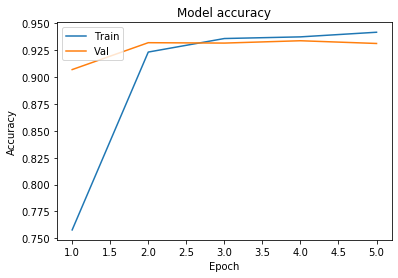

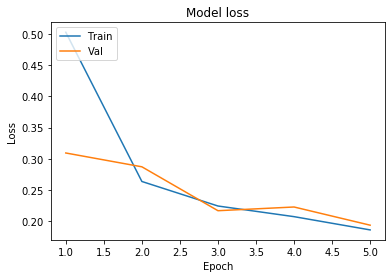

In [15]:
plot_learningCurve(history, 5)